# Step 1: Install and import modules

In [ ]:
pip install opencv-python
pip install matplotlib
pip install numpy
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

In [16]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Image loading and text recognition using EasyOCR

In [6]:
im_1_path = './images/1_carplate.jpg'
im_2_path = './images/2_handwriting.jpg'
im_3_path = './images/3_digits.jpg'
im_4_path = './images/4_invoice.jpg'
im_5_path = './images/5_sign.jpg'

In [7]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [8]:
result = recognize_text(im_1_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [15]:
result

[([[1419, 1891], [1452, 1891], [1452, 1933], [1419, 1933]],
  'S',
  0.8508090006221778),
 ([[1522, 1790], [2203, 1790], [2203, 1964], [1522, 1964]],
  'CCC444',
  0.65295571078682),
 ([[1638, 1950], [2013, 1950], [2013, 2003], [1638, 2003]],
  'T E $ L A. C 0 M',
  0.3041922557390645),
 ([[2519, 2006], [2790, 2006], [2790, 2036], [2519, 2036]],
  'DUAL motoR',
  0.5394900931176712)]

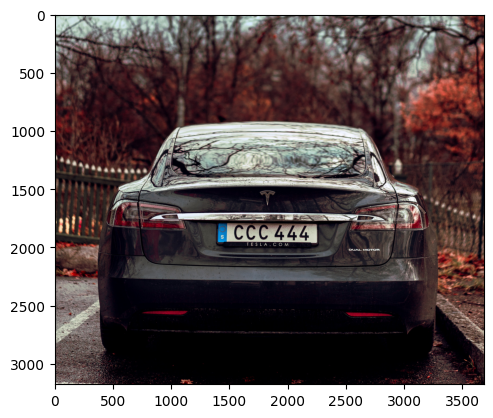

In [10]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Step 3: Overlay recognized text on image using OpenCV

In [11]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: S (Probability: 0.85)
Detected text: CCC444 (Probability: 0.65)
Detected text: DUAL motoR (Probability: 0.54)


<Figure size 640x480 with 0 Axes>

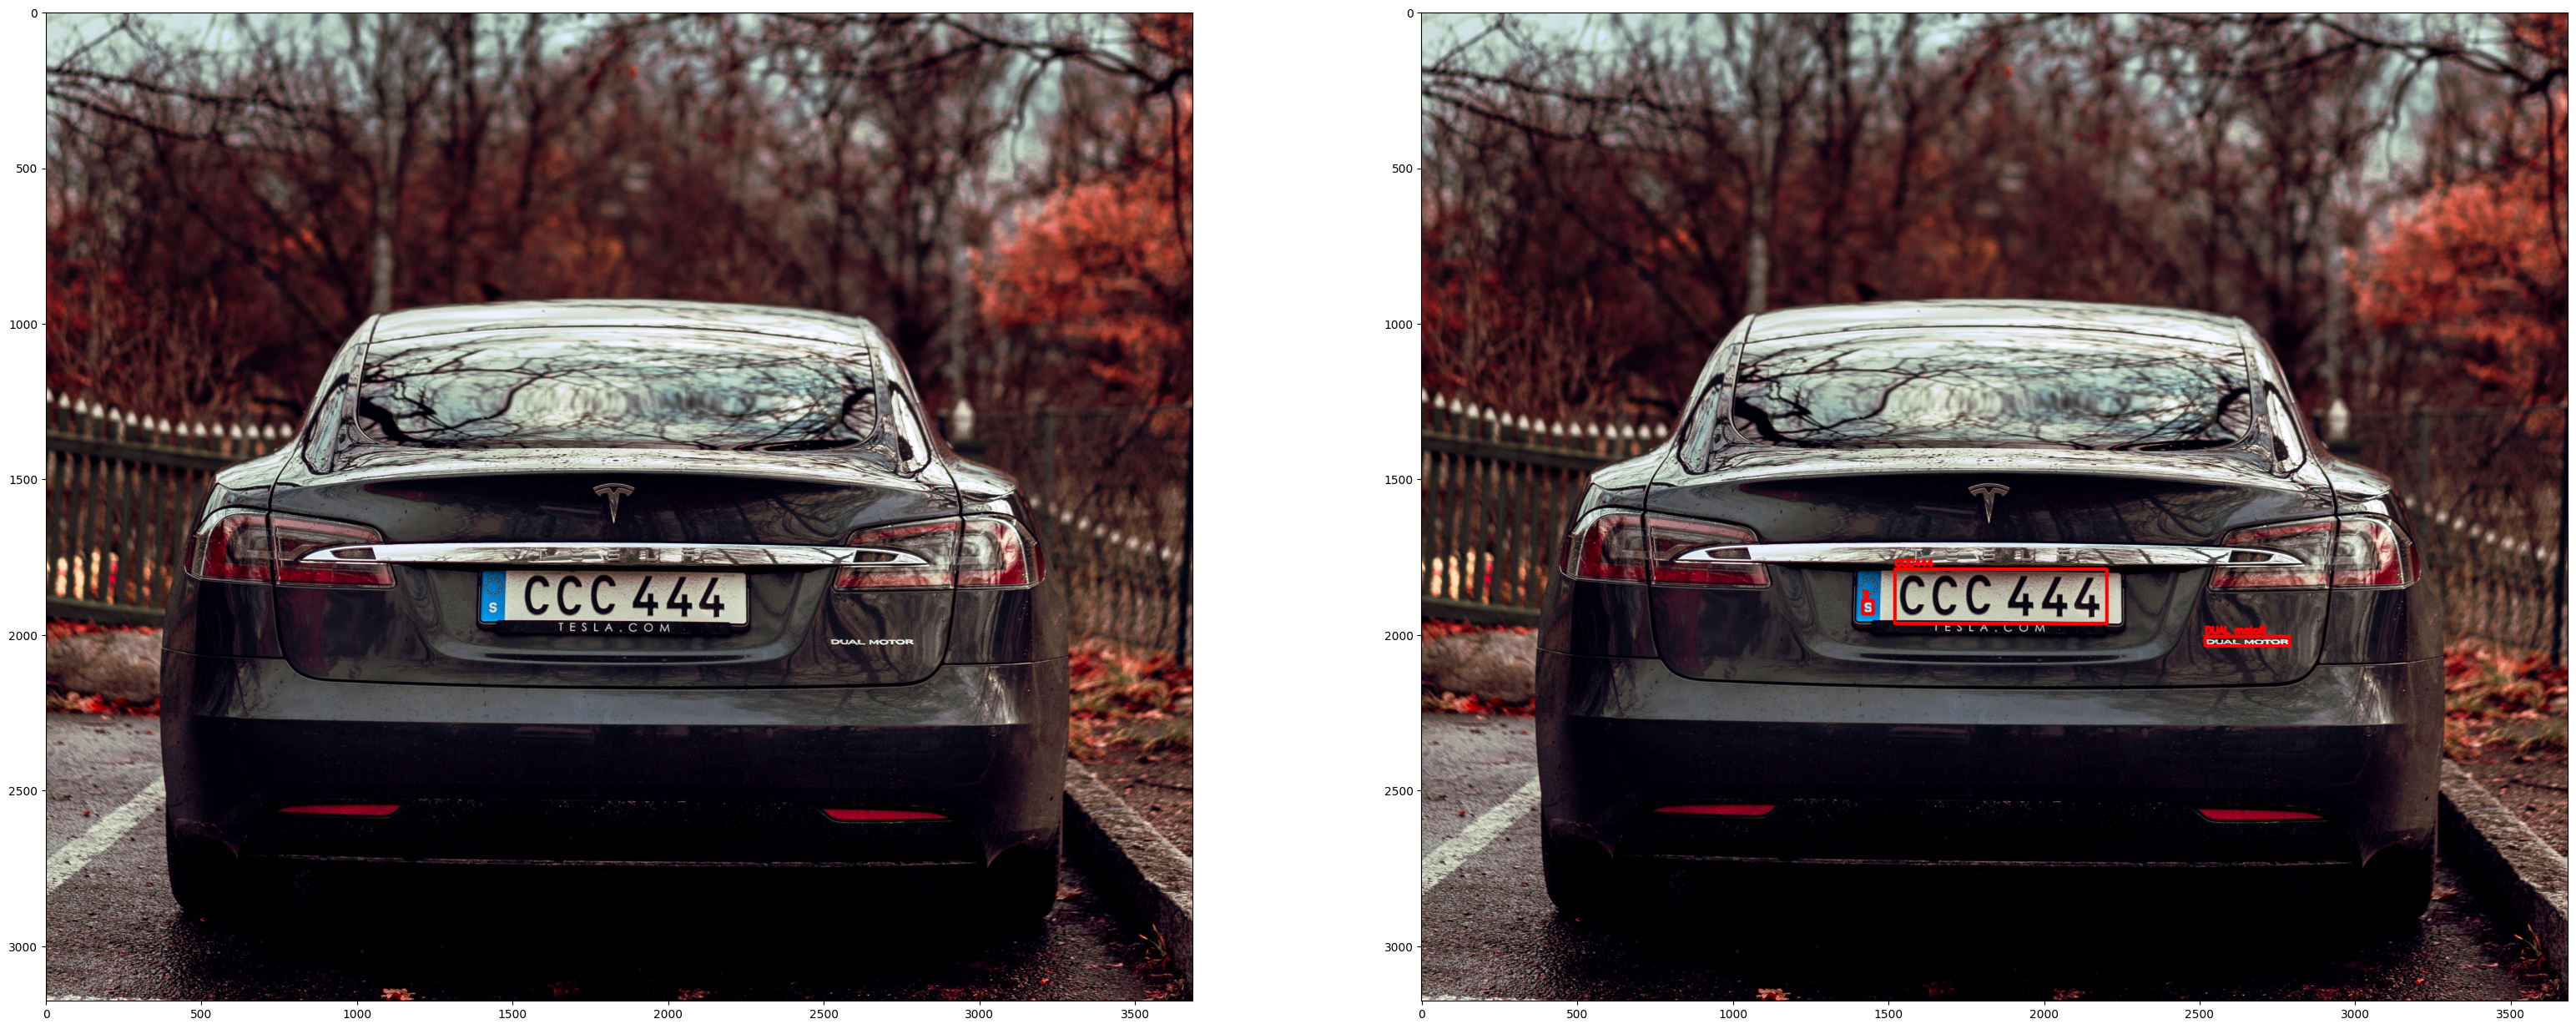

In [12]:
overlay_ocr_text(im_1_path, '1_carplate')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: No One (Probability: 1.00)
Detected text: Is (Probability: 1.00)
Detected text: Your (Probability: 1.00)
Detected text: Fireworks (Probability: 0.95)
Detected text: Video (Probability: 1.00)
Detected text: Watching (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

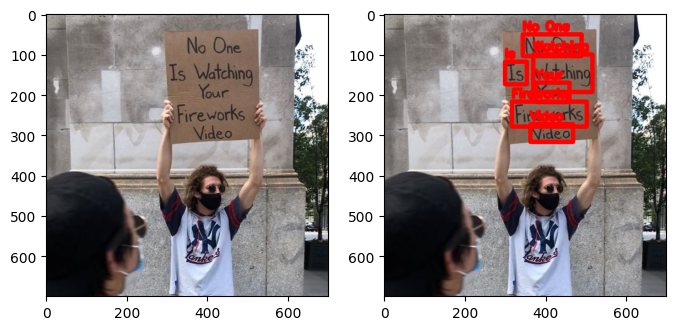

In [8]:
overlay_ocr_text(im_2_path, '2_handwriting')

In [ ]:
overlay_ocr_text(im_3_path, '3_digits')

In [ ]:
overlay_ocr_text(im_4_path, '4_invoice')

In [ ]:
overlay_ocr_text(im_5_path, '5_roadsign')